# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [9]:
# WRITE YOUR CODE HERE
library(tidyverse)
data = read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 = data %>% select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>% drop_na()

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

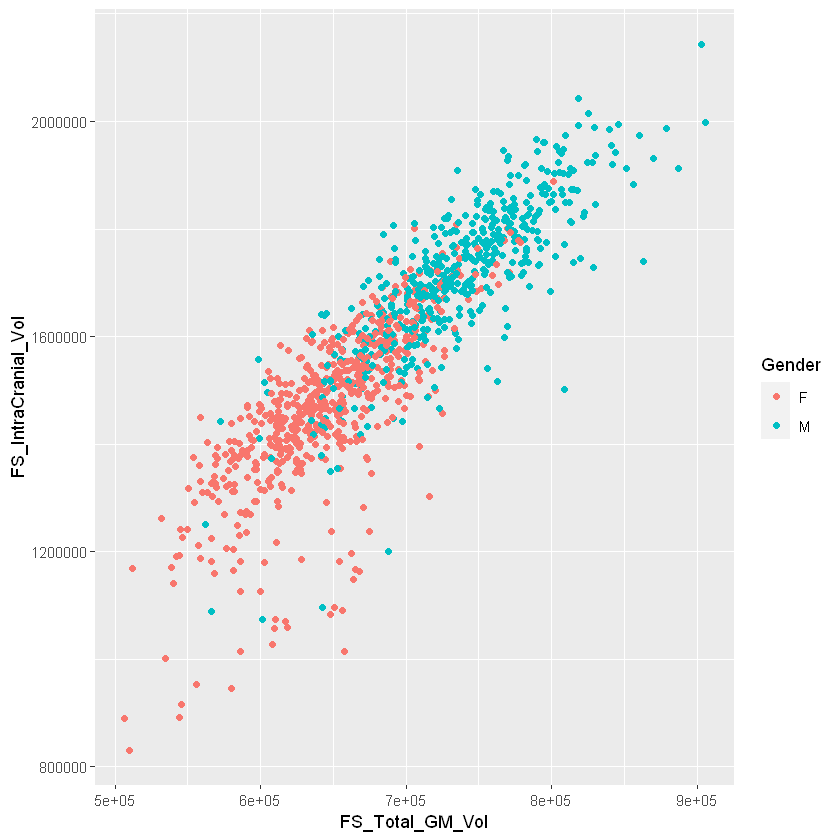

In [4]:
# WRITE YOUR CODE HERE
library(ggplot2)
ggplot(d1, aes(x=FS_Total_GM_Vol, y=FS_IntraCranial_Vol, color=Gender)) +
    geom_point()


What patterns do you observe in the scatter plot?

> Gray matter volume correlates positively with intracranial volume for both men and women. It appears that the strength of correlation is the same regardless of gender. However, men tend to have more gray matter and intracranial volume than women.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [18]:
# WRITE YOUR CODE HERE
d1$Gender = as.factor(d1$Gender)

glm = glm(Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + FS_Total_GM_Vol, data=d1, family=binomial)
summary(glm)



Call:
glm(formula = Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + 
    FS_Total_GM_Vol, family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Intracranial volume and gray matter volume are significantly associated with gender.

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [23]:
# WRITE YOUR CODE HERE
model = data.frame(predict(glm, type="response"))
colnames(model) = c("predict")
model$binary = rep("F", nrow(model))
model$binary[model$predict > 0.5] = "M"

confusion = data.frame(model$binary, d1$Gender)
colnames(confusion) = c("predicted", "actual")
table(confusion)
mean(confusion$actual == confusion$predicted)

         actual
predicted   F   M
        F 516 110
        M  90 397

[1] 0.8203055

What is the prediction accuracy for gender from the full model?

> The model has 82.03% accuracy for gender.

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8203055 2.515723e-05  0.01182065

[1] 0.7966893

[1] 0.8439719

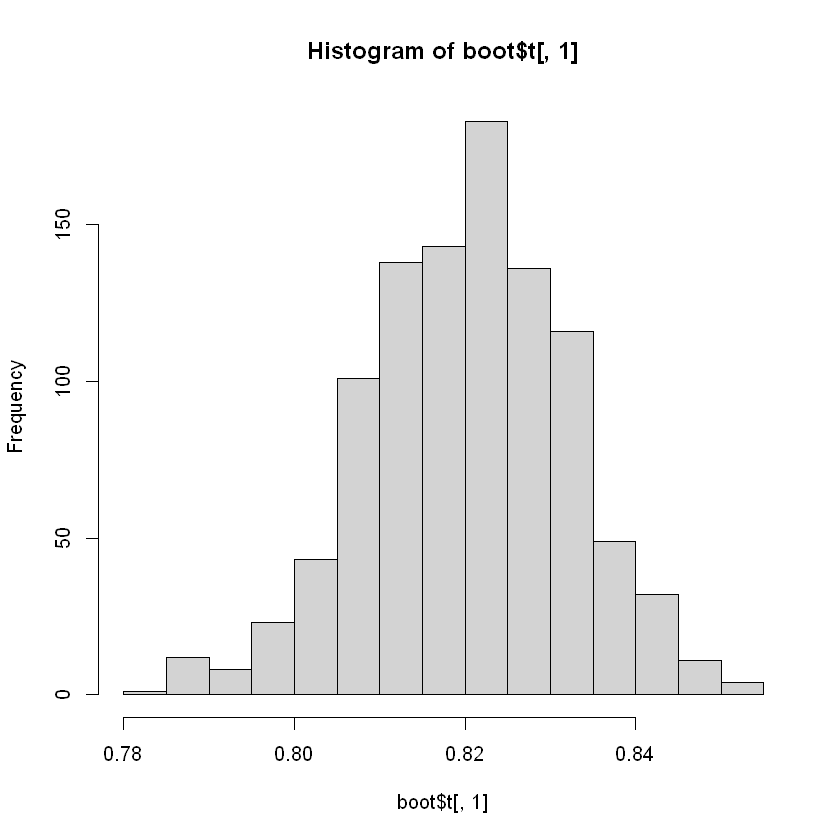

In [54]:
# WRITE YOUR CODE HERE
#install.packages("boot")
#install.packages("ISLR")
library(ISLR)
library(boot)

boot.fn = function(data, index){
    model_temp = data.frame(predict(glm, data[index,], type='response'))
    colnames(model_temp) = c("predict")
    model_temp$binary = rep("F", nrow(model_temp))
    model_temp$binary[model_temp$predict > 0.5] = "M"

    confusion = data.frame(model_temp$binary, d1$Gender[index])
    colnames(confusion) = c("predicted", "actual")
    mean(confusion$actual == confusion$predicted)
}

#boot = boot(d1, boot.fn, R=1000)
boot
hist(boot$t[,1])
mean(boot$t) - 2*sd(boot$t)
mean(boot$t) + 2*sd(boot$t)

How robust is the prediction accuracy of the full model?

> The bootstrap mean is 0.8203, which is the same as our full model prediction accuracy. The standard deviation is within the single digits (of percentage). Our confidence interval for prediction accuracy is 0.7967 to 0.8440.  I would say that the prediction accuracy for the full model is robust.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

[1] 0.8052713

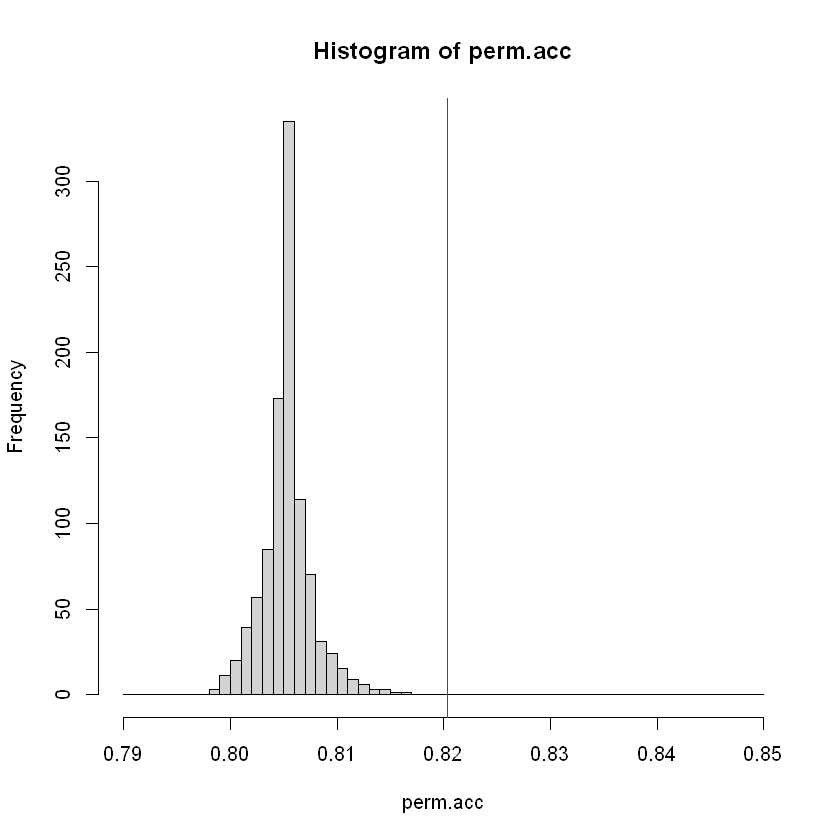

In [82]:
# WRITE YOUR CODE HERE
# permd1 = d1
# R = 1000
# perm.acc = rep(NA, R)

# for (i in 1:R){
#     permd1$FS_Total_GM_Vol = d1$FS_Total_GM_Vol[sample(nrow(d1))]
#     glm_temp = glm(Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + FS_Total_GM_Vol, data=permd1, family=binomial)
    
#     model_temp = data.frame(predict(glm_temp, permd1, type="response"))
#     colnames(model_temp) = c("predict")
#     model_temp$binary = rep("F", nrow(model_temp))
#     model_temp$binary[model_temp$predict > 0.5] = "M"

#     confusion_temp = data.frame(model_temp$binary, permd1$Gender)
#     colnames(confusion_temp) = c("predicted", "actual")
#     table(confusion_temp)
#     perm.acc[i] = mean(confusion_temp$actual == confusion_temp$predicted)
# }

hist(perm.acc, breaks = seq(0.79, 0.85, 0.001)) #abline went past the original x-axis so I had to change the breaks
abline(v=mean(confusion$actual == confusion$predicted), col='red')
mean(perm.acc)

How much does the grey matter volume influence the prediction accuracy of the model?

> Gray matter seems to have a significant influence on prediction accuracy. However that influence does not appear to be very large as it seems the mean prediction accuracy without gray matter is 0.805 compared to the full model mean (0.8203)

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> Bootstrapping is a method of creating "new data" from existing data by sampling with replacement in order to create confidence intervals for model parameters. Permutation tests destroy any relationship between certain variables by randomizing the (relevant) explanatory variables -- this way we can create a null distribution so we can perform hypothesis tests on model parameters.

**DUE:** 5pm EST, March 29, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*